sklearn calls all the algorithms as estimator. Sklearn focuses on applying models and performance metrics, if we want deep statistical information we need to use statsmodel. 

in supervised machine learning we need to do a train test split. Within the the split there x train, x test, y train, and y test 


## Multivariable Linear Regression 

what is the realtionship between each advertising channel and sales? 


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
df = pd.read_csv("../data/Advertising.csv")

In [8]:
df

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

## visual relationship between each advertising channel and sales


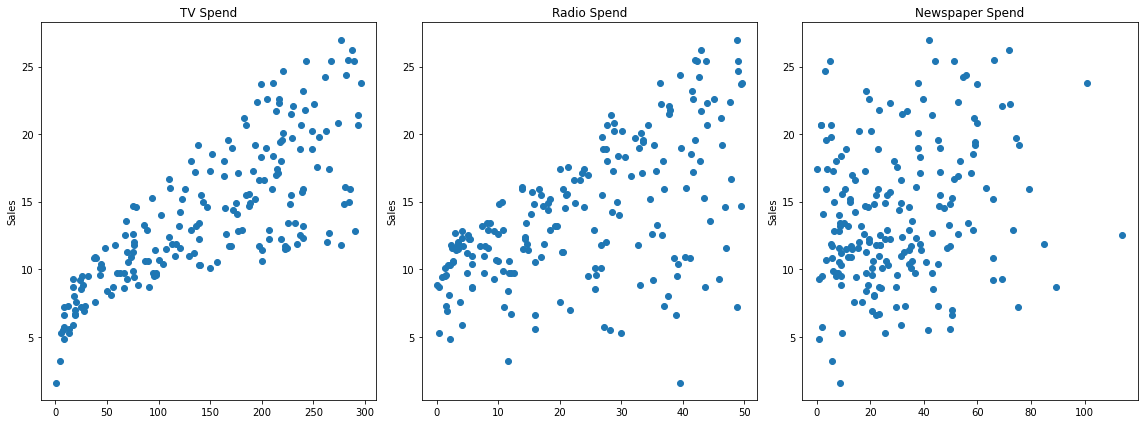

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

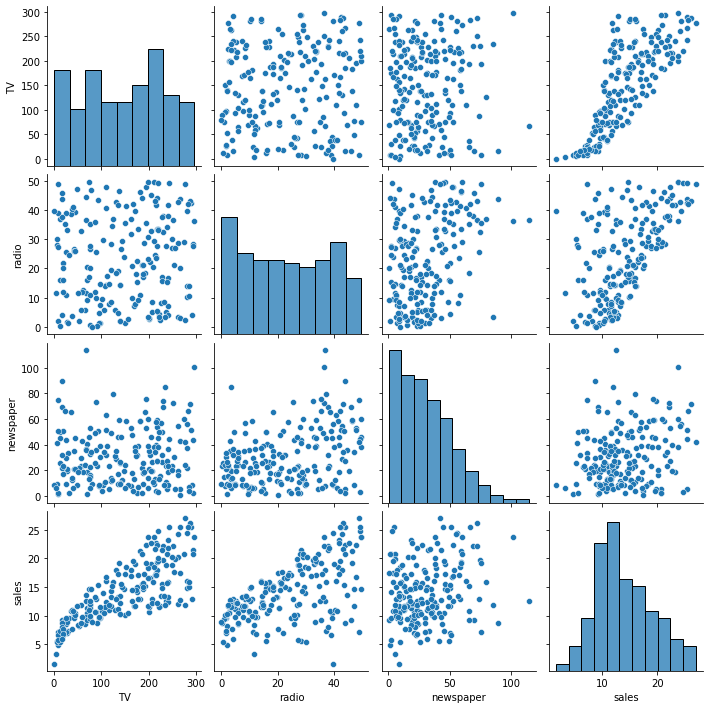

In [10]:

# if we don't want to run all subplot command 
# even compares realtionship between each feature 
sns.pairplot(df)

## Splitting the data

In [18]:
# features are the remaining columsn that are not the label columns 
# we don't normalize the data 
X = df.drop('sales', axis = 1)

In [19]:
X 

TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [20]:
y = df['sales']

In [14]:
# train test split 
from sklearn.model_selection import train_test_split 

In [28]:

# help(train_test_split)

In [17]:
# tuple unpacking 
# does a shuffle of the data incase they're sorted 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
# creating an estimator from sci-kit learn 
# we can choose a particular model 
from sklearn.linear_model import LinearRegression 

In [25]:
# hyperparameters are paremeters we can change to change the performance of the model 
# help(LinearRegression)

In [23]:
linear_model = LinearRegression()

In [24]:
# inplace training
linear_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# we can evaluate the model using difference metrics 
# evaluating the "fit"
linear_model.predict(X_test)

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

## Performance Evaluation

recall that linear regression is a regression model that predicts continuous values. For example, attempting to predict the price of a house given it's features is a regression task. Atemmpting to predict the country a house is in given its features would be a calssification task. 

accuracy and recall are not useful in this case. MAE, MSE, and RMSE are metrics to use for regression models. 

### Mean Absolute Error 

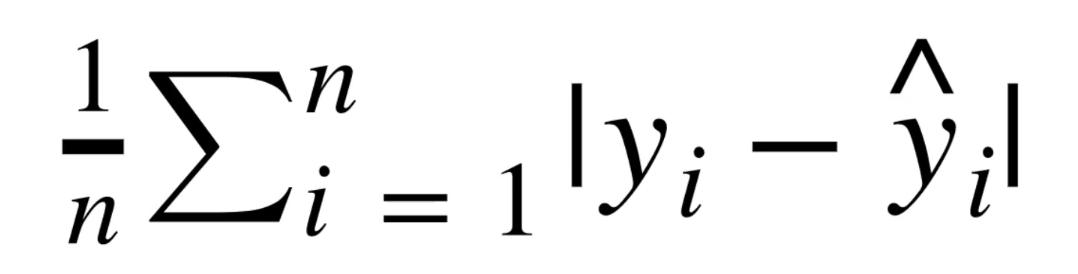

takes the average of sums of predicted value subtracteed from real value. Although it's easy to understand the issue is that MAE won't punish large errors. We're not going to be aware of outliers in data.

### Means Squared Error 

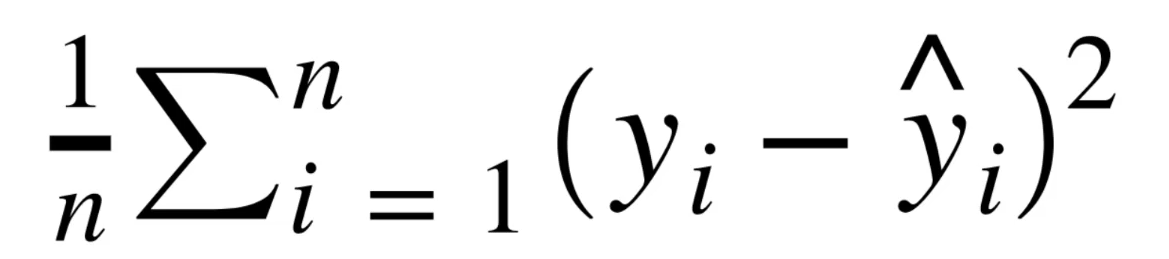

instead we can use MSE to punish large errors (outliers) by squaring it 
although it's reporting the wrong units. 

### Root Mean Square Error 

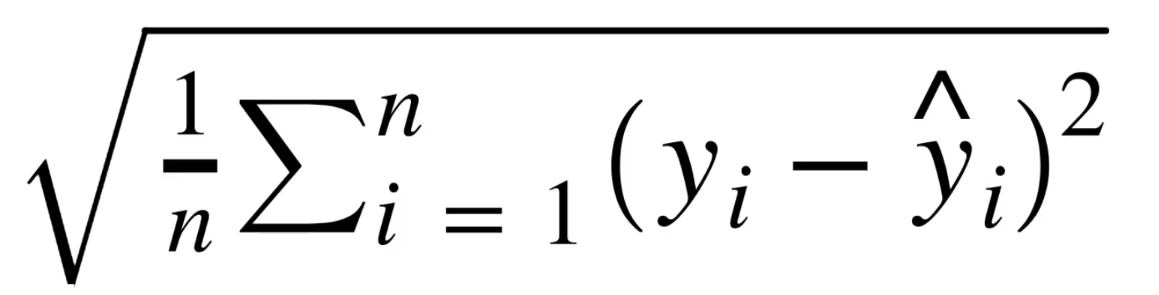

most popular since it punishes large errors and reports with the same units. 

a good RMSE is based on context and what we're trying to predict. We should also compare the error metric to the average valeu of the label in your data set to try to get an intuition of it's overall performance. 

depedning on the application like dosage of medication or human performance will determine the nature of RMSE like detecting a fluxation or setting a baseline of RMSE. 

In [32]:
test_predictions = linear_model.predict(X_test)

In [31]:
y_test 

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
       ... 
97     15.5
31     11.9
12      9.2
35     12.8
119     6.6
Name: sales, Length: 66, dtype: float64

In [33]:
test_predictions

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

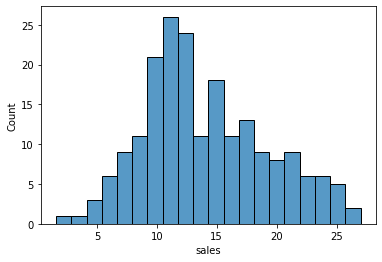

In [49]:
# histogram 
sns.histplot(data=df, x ='sales', bins = 20)

In [52]:
# we're taking the MAE of the true y predictoin and test y prediciton
# we can then take this value and compare to the mean
# about 1.4938 which is a 10% error 
mean_absolute_error(y_test, test_predictions) 

1.4937750024728964

is this a good MSE? well if this is a first we can compare to the original mean 

In [54]:
# we can't directly compare this so we get the squared
np.sqrt(mean_squared_error(y_test, test_predictions))

# which retturns a slightly higher than 10% error range 

1.9307843822347197